# Classification study

Please, use this notebook to better understand expressiveness and limitations of different classifiers.

You can find relatively detailed example of examining and tuning of one classifier (Decision Tree). Please, don't hesitete to update the notebook using the same approaches to all or at least some others classifiers to achieve better results.

You are also welcome to add any others models to compare.

See also: [sklearn classifiers comparison example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and find any detail in [sklearn User Guied](https://scikit-learn.org/stable/user_guide.html#user-guide) and [sklearn API Reference](https://scikit-learn.org/stable/modules/classes.html).

In [2]:
import numpy as np
from sklearn import datasets,metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

## Get data

Create artificial dataset ([try others](https://scikit-learn.org/stable/modules/classes.html#samples-generator))

In [4]:
X, y = datasets.make_classification(n_samples=1000, n_features=2,
                                    n_informative=2, n_redundant=0, 
                                    n_repeated=0,
                                    n_classes=4,
                                    n_clusters_per_class=1,
                                    weights=None,
                                    flip_y=0.01,
                                    class_sep=1.0,
                                    hypercube=True,
                                    shift=1.0,
                                    scale=1.0,
                                    shuffle=False,
                                    random_state=1337)

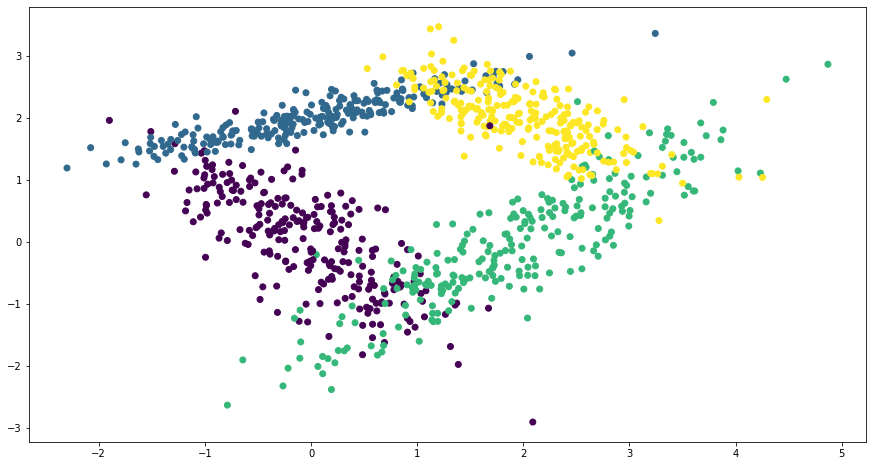

In [5]:
plt.scatter(X[:,0], X[:,1], c = y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [272]:
results = {}

In [118]:
def plot_clf(model, X, y, resolution = 100, ax=None, cmap='rainbow', string='', score=0, std=0):
    '''
    Visualize 2d decsision boundary of any sklearn-compatible classifier
    '''
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # evaluate grid of points
    xx, yy = np.meshgrid(np.linspace(*xlim, num=resolution),
                         np.linspace(*ylim, num=resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    #score = metrics.accuracy_score(y, model.predict(X))

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.title(type(model).__name__+'\n'+string+'\nCV_Score = %.3f' %score + '\nCV_std= %.3f' %std)


## Logistic regression

Try the [simplest](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) linear classifier

#### LM Model without intercept 

convergence after 21 epochs took 0 seconds
convergence after 19 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 29 epochs took 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


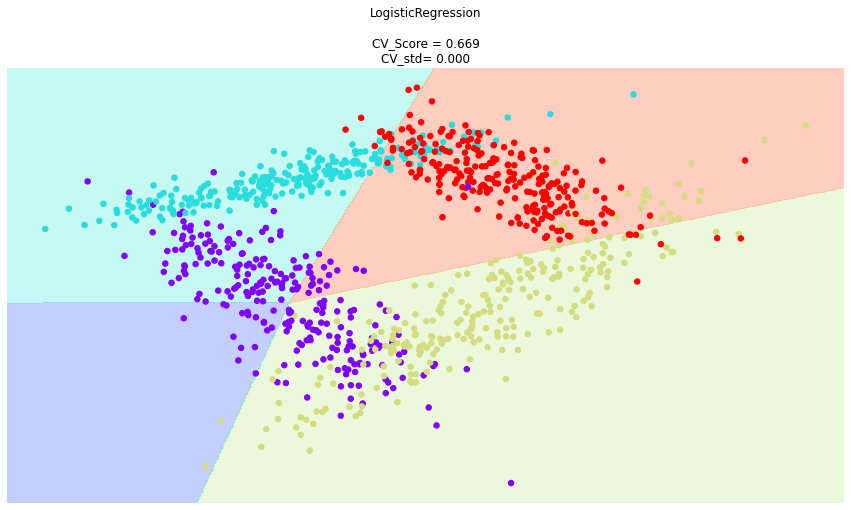

In [119]:
from sklearn import linear_model

model = linear_model.LogisticRegression(solver = 'sag',
                                            max_iter = 1000000, 
                                            verbose = 1, 
                                            fit_intercept=False)

model.fit(X_train,y_train)
plot_clf(model, X, y, resolution = 500, score=model.score(X_train, y_train), std=0)

#### LM model with intercept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

convergence after 38 epochs took 0 seconds
convergence after 41 epochs took 0 seconds
convergence after 43 epochs took 0 seconds
convergence after 38 epochs took 0 seconds
convergence after 47 epochs took 0 seconds
convergence after 41 epochs took 0 seconds
convergence after 44 epochs took 0 seconds
convergence after 42 epochs took 1 seconds
convergence after 36 epochs took 0 seconds
convergence after 42 epochs took 0 seconds
convergence after 41 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 38 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 36 epochs took 0 seconds
convergence after 31 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 46 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 43 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 40 epochs took 0 seconds

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished



convergence after 36 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 39 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 42 epochs took 0 seconds
convergence after 32 epochs took 0 seconds
convergence after 38 epochs took 0 seconds
convergence after 28 epochs took 0 seconds
convergence after 42 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 0 seconds
convergence after 39 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 35 epochs took 0 seconds
convergence after 33 epochs took 0 seconds
convergence after 31 epochs took 0 seconds
convergence after 30 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 37 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 27 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


convergence after 37 epochs took 0 seconds


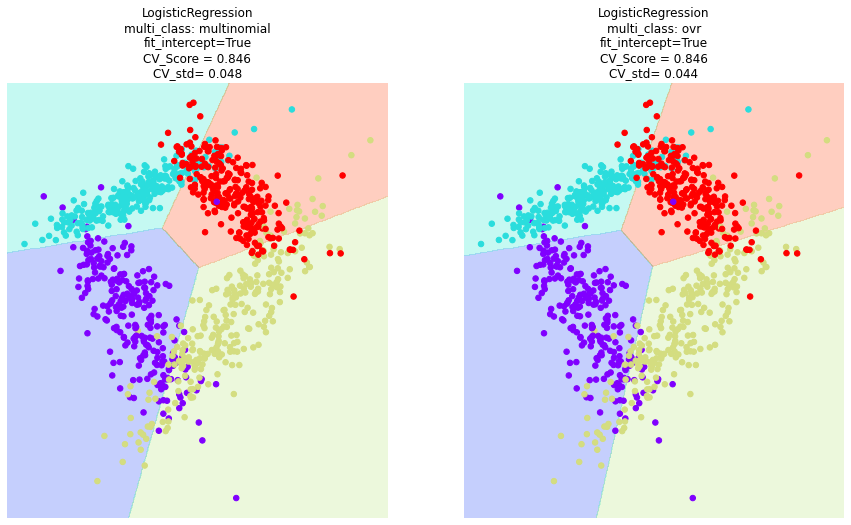

In [120]:
from sklearn import linear_model
res = {}

for i, multi_class in enumerate(('multinomial', 'ovr')):

    model = linear_model.LogisticRegression(solver = 'sag',
                                                tol=1e-6,
                                                max_iter = 100, 
                                                random_state=42,
                                                multi_class=multi_class,
                                                verbose = 1, 
                                                fit_intercept=True)

    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
    #test_scores = model.score(X_test,y_test)
    
    #res['LogReg' + '_' + multi_class] = {'CV_mean':scores.mean(), 'CV_std':scores.std()}
    plt.subplot(120 + i + 1)
    plot_clf(model, X, y, resolution = 500, string='multi_class: '+multi_class+'\nfit_intercept=True',
             score=scores.mean(), std=scores.std())


In [273]:
lm_model = linear_model.LogisticRegression(solver = 'sag',
                                            tol=1e-6,
                                            max_iter = 100, 
                                            random_state=42,
                                            multi_class='ovr',
                                            verbose = 1, 
                                            fit_intercept=True)

lm_model.fit(X_train,y_train)
results['LogReg'] = lm_model.score(X_test,y_test)

convergence after 30 epochs took 0 seconds
convergence after 38 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
convergence after 36 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


## Augment data with polynomial features

Add [polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features) is the simpliest way to make classifier non-linear.

In [124]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [125]:
DEGREE = [2, 3, 5, 10, 25]

polynomial_features = PolynomialFeatures(degree = DEGREE) # try to overfit it!

[SKLearn Pipelines](https://scikit-learn.org/stable/modules/compose.html#pipelines-and-composite-estimators) is a great way to combine the whole process of transforming, normalizaing, modelling and evaluating in one managable, convenient entitiy.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 136 epochs took 0 seconds
convergence after 326 epochs took 1 seconds
convergence after 326 epochs took 0 seconds
convergence after 322 epochs took 0 seconds
convergence after 154 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 284 epochs took 0 seconds
convergence after 294 epochs took 0 seconds
convergence after 332 epochs took 0 seconds
convergence after 136 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 311 epochs took 1 seconds
convergence after 373 epochs took 0 seconds
convergence after 329 epochs took 0 seconds
convergence after 104 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 237 epochs took 0 seconds
convergence after 261 epochs took 0 seconds
convergence after 265 epochs took 1 seconds
convergence after 135 epochs took 0 seconds
convergence after 294 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 346 epochs took 0 seconds
convergence after 329 epochs took 0 seconds
convergence after 137 epochs took 0 seconds
convergence after 339 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 243 epochs took 0 seconds
convergence after 314 epochs took 0 seconds
convergence after 141 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 305 epochs took 0 seconds
convergence after 343 epochs took 0 seconds
convergence after 336 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 150 epochs took 0 seconds
convergence after 292 epochs took 1 seconds
convergence after 327 epochs took 0 seconds
convergence after 328 epochs took 0 seconds
convergence after 136 epochs took 0 seconds
convergence after 304 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 347 epochs took 0 seconds
convergence after 329 epochs took 0 seconds
convergence after 135 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 309 epochs took 0 seconds
convergence after 333 epochs took 0 seconds
convergence after 330 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 208 epochs took 0 seconds
convergence after 275 epochs took 0 seconds
convergence after 328 epochs took 0 seconds
convergence after 329 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 4 seconds
max_iter reached after 3 seconds
max_iter reached after 4 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 3 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 3 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 3 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 3 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 3 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 3 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 3 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 3 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 2 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 2 seconds
max_iter reached after 3 seconds
max_iter reached after 2 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.1s finished


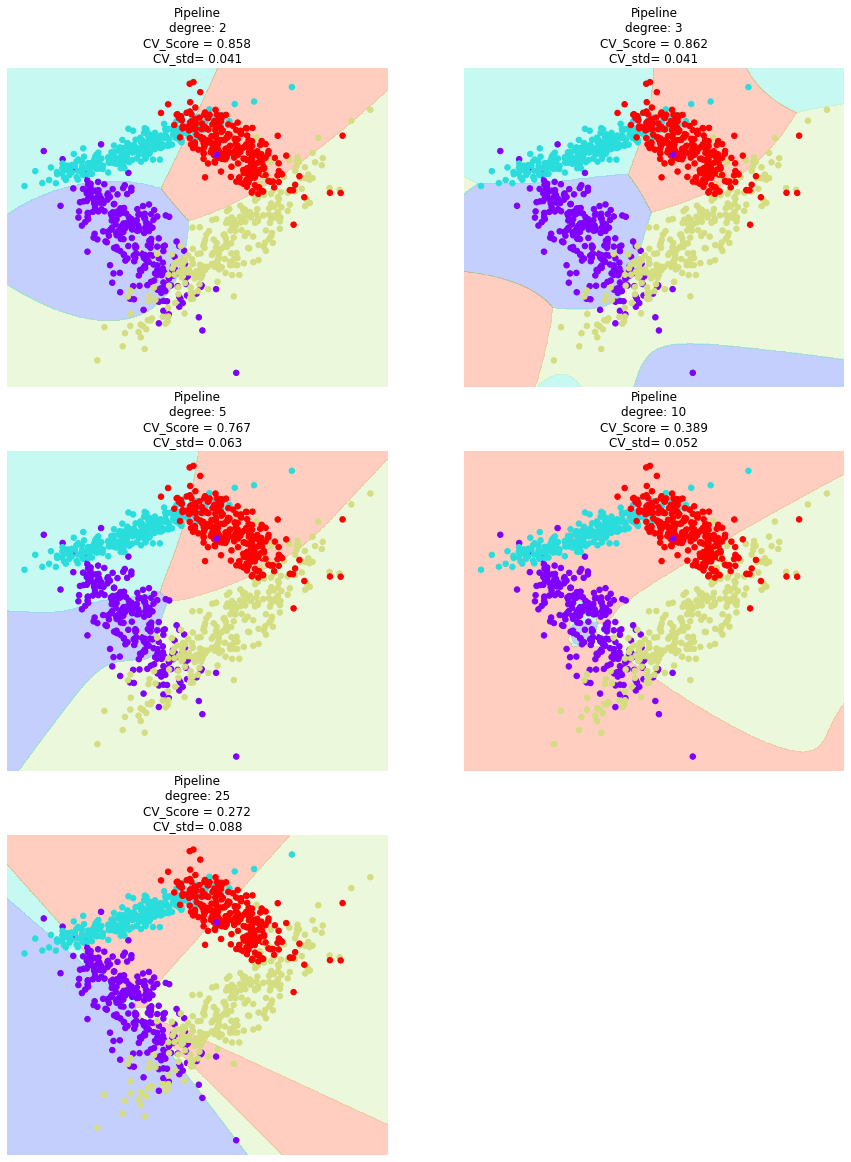

In [126]:
plt.rcParams['figure.figsize'] = [15,20]

for i, degree in enumerate(DEGREE): 
    polynomial_features = PolynomialFeatures(degree = degree)
    model = linear_model.LogisticRegression(solver = 'sag',
                                            max_iter = 1000, 
                                            random_state=42,
                                            multi_class=multi_class,
                                            verbose = 1, 
                                            fit_intercept=False)
    
    pipeline = Pipeline([("polynomial_features", polynomial_features), # augment data
                           ("estimator", model)]) # apply linear regression

    pipeline.fit(X,y) # you can add any preprocessing to pipeline and treat it as a single model
    
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=10)
    #test_scores = model.score(X_test,y_test)
    
    #res['LogReg_'+str(degree)] = {'CV_mean':scores.mean(), 'CV_std':scores.std()}
    
    plt.subplot(320 + i + 1)
    plot_clf(pipeline, X, y, resolution = 500, string='degree: '+str(degree),
             score=scores.mean(), std=scores.std())
    

In [274]:
DEGREE = 3 #has the besr cross validation score
polynomial_features = PolynomialFeatures(degree = DEGREE) 

In [275]:
pol_model = linear_model.LogisticRegression(solver = 'sag',
                                            max_iter = 1000, 
                                            random_state=42,
                                            multi_class=multi_class,
                                            verbose = 1, 
                                            fit_intercept=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished


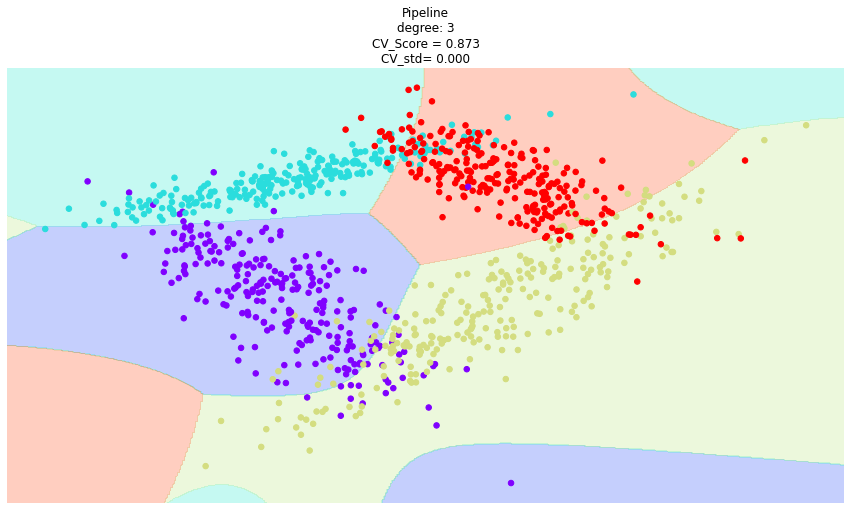

In [276]:
plt.rcParams['figure.figsize'] = [15,8]

pipeline = Pipeline([("polynomial_features", polynomial_features), # augment data
                       ("estimator", pol_model)]) # apply linear regression

pipeline.fit(X,y) # you can add any preprocessing to pipeline and treat it as a single model
results['LogReg_'+str(DEGREE)] = pipeline.score(X_test,y_test)

plot_clf(pipeline, X, y, resolution = 500, string='degree: '+str(DEGREE), score=pipeline.score(X_train, y_train), std=0)

## [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Find more examples and practical tips in [user guide](https://scikit-learn.org/stable/modules/tree.html#tree).

#### It is overfit model 

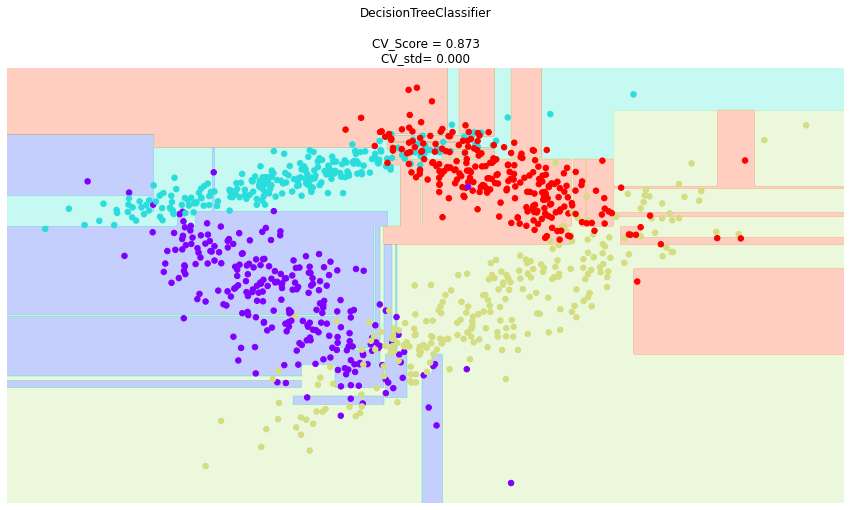

In [277]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', 
                               splitter='best', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               class_weight=None, 
                               presort=False)
model.fit(X_train, y_train)
results['Tree_overfit'] = pipeline.score(X_test,y_test)

plot_clf(model,X,y,resolution = 500, score=pipeline.score(X_train, y_train), std=0)

###  Random Search

In [279]:
model = DecisionTreeClassifier()

random_grid = {'criterion': ["gini", 'entropy'],
               'max_depth': range(1, 12),
               'min_samples_split': range(2, 10),
               'min_samples_leaf': range(1, 6)}

rnd_grid_tree = RandomizedSearchCV(model, random_grid, cv=10,
                                   scoring=None, n_iter=10, verbose = 1)

In [280]:
%%time
rnd_grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 335 ms


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [281]:
print("rnd_grid.best_score_ {:.2f}".format(rnd_grid_tree.best_score_))

print("rnd_grid.best_params_ {}".format(rnd_grid_tree.best_params_))
print('\n')
print("rnd_grid.best_estimator_ {}".format(rnd_grid_tree.best_estimator_))

rnd_grid.best_score_ 0.88
rnd_grid.best_params_ {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'gini'}


rnd_grid.best_estimator_ DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [282]:
results['Tree'] = rnd_grid_tree.best_estimator_.score(X_test,y_test)

In [210]:
rnd_grid_tree.best_estimator_.score(X_train, y_train)

0.9

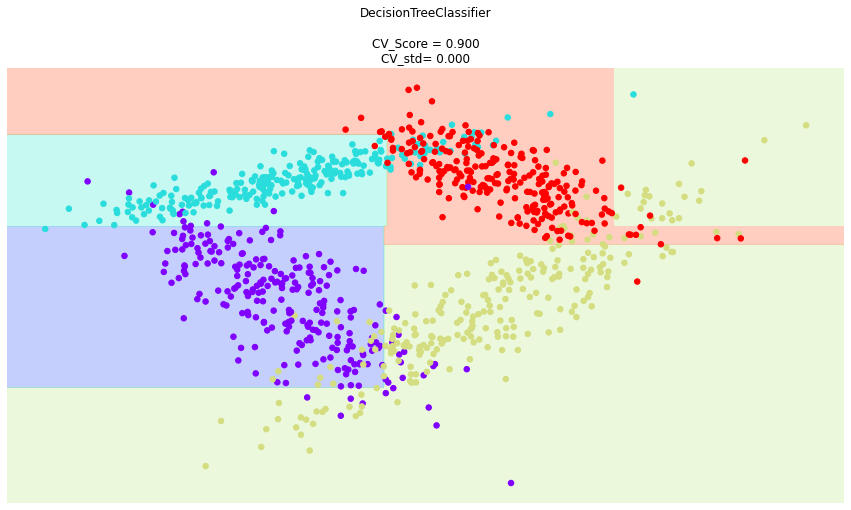

In [283]:
plot_clf(rnd_grid_tree.best_estimator_, X, y, 500, score=rnd_grid_tree.best_estimator_.score(X_train, y_train), std=0)

In [284]:
DEGREE = 3
polynomial_features = PolynomialFeatures(degree = DEGREE) 

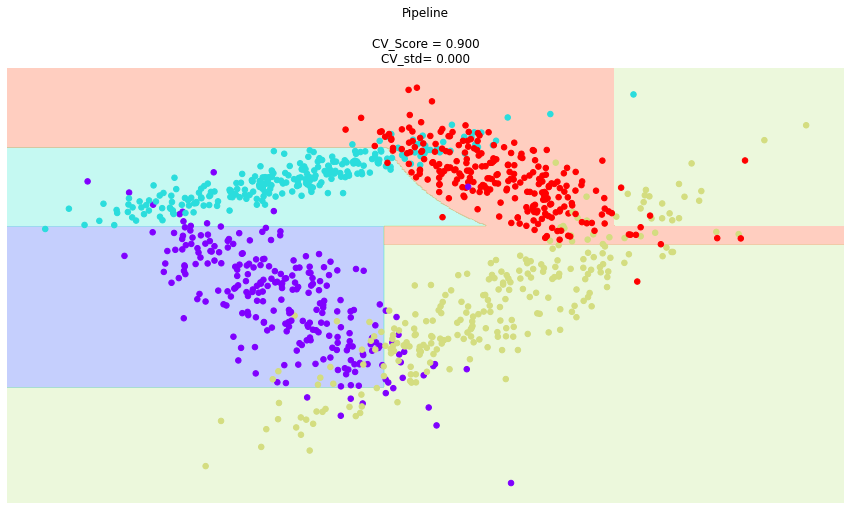

In [285]:
estimator = rnd_grid_tree.best_estimator_

pipeline = Pipeline([("polynomial_features", polynomial_features),("estimator", estimator)]) 


pipeline.fit(X_train, y_train)
results['Tree_'+str(DEGREE)] = pipeline.score(X_test,y_test)

plot_clf(pipeline, X, y, 500, score=pipeline.score(X_train, y_train), std=0)

## Other models snippets

### [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest) Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier

###  Random Search

In [237]:
model = RandomForestClassifier()

# only some parameters will be tried
random_grid = {'bootstrap': [True, False],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in range(10, 541, 10)],
               'min_samples_split': [2, 5, 10, 15],
               'min_samples_leaf': [1, 2, 4, 10],
               'n_estimators': [int(x) for x in range(100, 2000, 100)],}

rnd_grid_RF = RandomizedSearchCV(model, random_grid, cv=10,
                                  scoring=None, n_iter=10, verbose = 1)

In [239]:
%%time
rnd_grid_RF.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 6min 46s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [240]:
print("rnd_grid.best_score_ {:.2f}".format(rnd_grid_RF.best_score_))

print("rnd_grid.best_params_ {}".format(rnd_grid_RF.best_params_))
print('\n')
print("rnd_grid.best_estimator_ {}".format(rnd_grid_RF.best_estimator_))


rnd_grid.best_score_ 0.88
rnd_grid.best_params_ {'n_estimators': 1600, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 220, 'criterion': 'gini', 'bootstrap': True}


rnd_grid.best_estimator_ RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=220, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [287]:
results['RandomForest'] = rnd_grid_RF.best_estimator_.score(X_test,y_test)

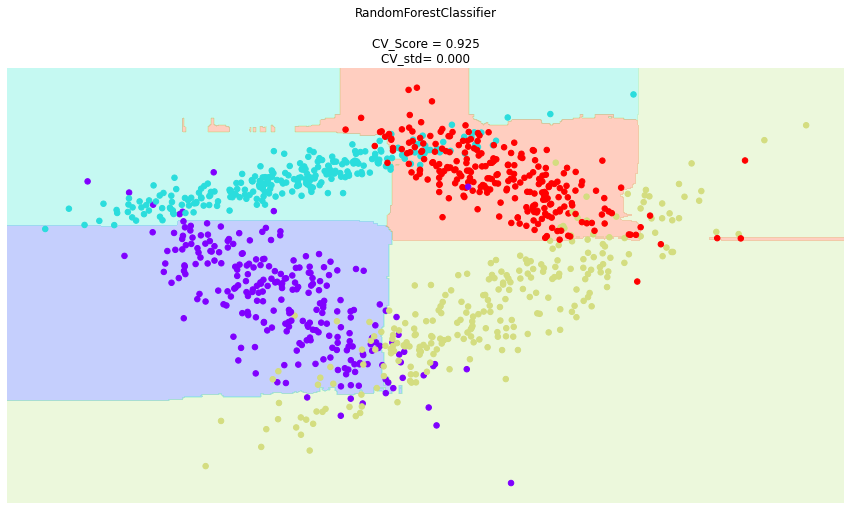

In [241]:
plot_clf(rnd_grid_RF.best_estimator_, X, y, 500, score=rnd_grid_RF.best_estimator_.score(X_train, y_train), std=0)

Look at SKLearn example for [Random Forest feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

### [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) Classifier

#### Overfit model

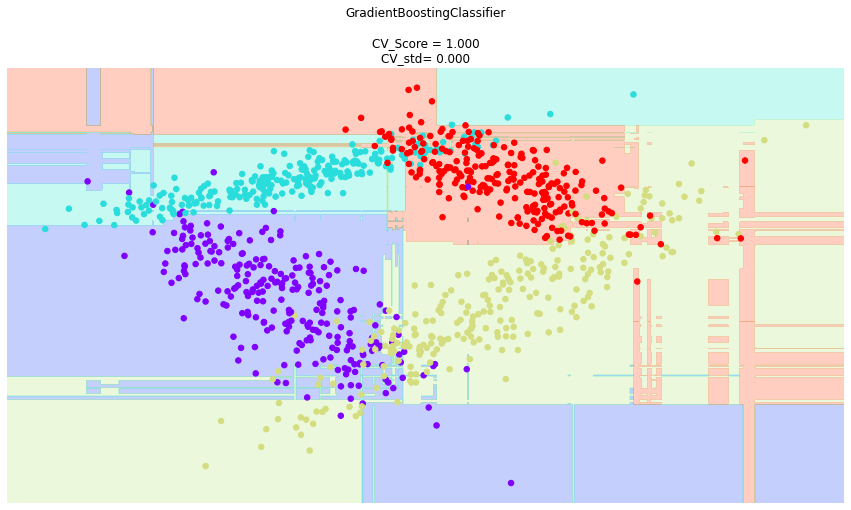

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance',
                                   learning_rate=0.1,
                                   n_estimators=100,
                                   subsample=1.0,
                                   criterion='friedman_mse',
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0,
                                   max_depth=3,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None,
                                   init=None,
                                   random_state=None,
                                   max_features=None,
                                   verbose=0,
                                   max_leaf_nodes=None,
                                   warm_start=False,
                                   presort='auto',
                                   validation_fraction=0.1,
                                   n_iter_no_change=None,
                                   tol=0.0001)
model.fit(X_train, y_train)
results['GBM_overfit'] = model.score(X_test,y_test)

plot_clf(model, X,y,1000, score=pipeline.score(X_train, y_train), std=0)

###  Random Search

In [268]:
model = GradientBoostingClassifier()

# only some parameters will be tried
param_dist = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "min_samples_leaf": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":range(10, 901, 10)
}

rnd_grid_gbm = RandomizedSearchCV(model, param_dist, cv=10,
                                  scoring=None, n_iter=10, verbose = 1)

In [269]:
%%time
rnd_grid_gbm.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.3min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 4min 25s


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [270]:
print("rnd_grid.best_score_ {:.2f}".format(rnd_grid_gbm.best_score_))

print("rnd_grid.best_params_ {}".format(rnd_grid_gbm.best_params_))
print('\n')
print("rnd_grid.best_estimator_ {}".format(rnd_grid_gbm.best_estimator_))


rnd_grid.best_score_ 0.85
rnd_grid.best_params_ {'subsample': 1.0, 'n_estimators': 210, 'min_samples_split': 0.32222222222222224, 'min_samples_leaf': 0.14444444444444446, 'max_features': 'sqrt', 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.075, 'criterion': 'mae'}


rnd_grid.best_estimator_ GradientBoostingClassifier(criterion='mae', init=None, learning_rate=0.075,
                           loss='deviance', max_depth=8, max_features='sqrt',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.14444444444444446,
                           min_samples_split=0.32222222222222224,
                           min_weight_fraction_leaf=0.0, n_estimators=210,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
         

In [288]:
results['GBM'] = rnd_grid_gbm.best_estimator_.score(X_test,y_test)

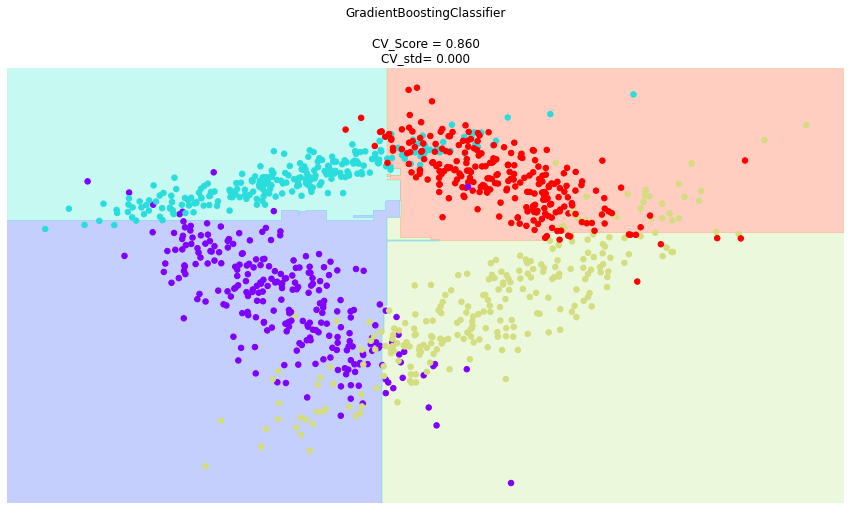

In [271]:
plot_clf(rnd_grid_gbm.best_estimator_, X, y, 500, score=rnd_grid_gbm.best_estimator_.score(X_train, y_train), std=0)

### XGBoost

[XGBoost](https://xgboost.readthedocs.io/en/latest/) is not a model, but a popular library with Gradient Boosting Machines implementation. But name XGBoost is oftenly used instead of model's name and since its interface is fully compatible with sklearn, it's excusable to be confused...

[21:44:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




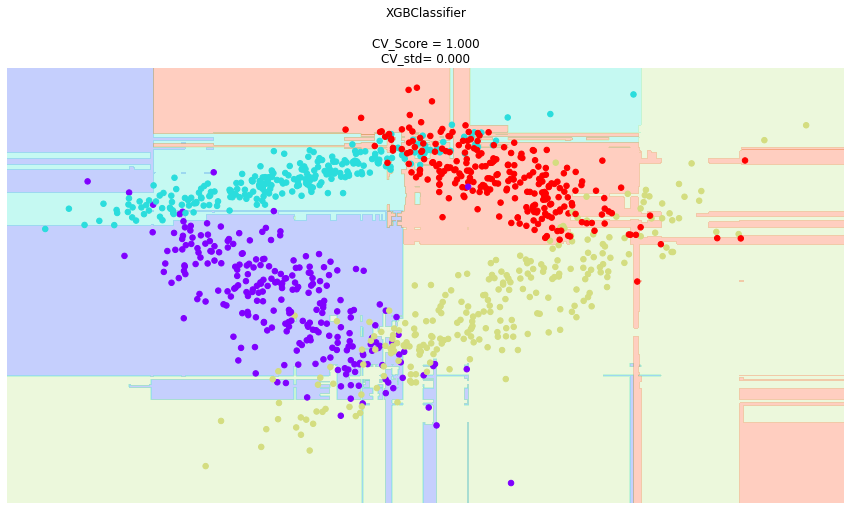

In [290]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=3, n_estimators = 500, 
                          verbosity=1,
                          silent=None,
                          objective='binary:logistic',
                          booster='gbtree',
                          n_jobs=1,
                          nthread=None,
                          gamma=0,
                          min_child_weight=1,
                          max_delta_step=0,
                          subsample=1,
                          colsample_bytree=1,
                          colsample_bylevel=1,
                          colsample_bynode=1,
                          reg_alpha=0,
                          reg_lambda=1,
                          scale_pos_weight=1,
                          base_score=0.5,
                          random_state=0,
                          seed=None,
                          missing=None)

model.fit(X_train,y_train)
results['XGB_GBM_overfit'] = model.score(X_test,y_test)

plot_clf(model, X,y,1000, score=model.score(X_train, y_train), std=0)

You can also be interested to try Microsoft's [LightGBM](https://lightgbm.readthedocs.io/en/latest/) or even Yandex's [CatBoost](https://catboost.ai/docs/) imbplementation of GBM... Yes, it's works so good, that everybody wants their own library.

## Tuning Xjboost

In [59]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

### Grid Search

#### Grid Search is much slower than Random Search (26min 53s >> 12.4 s) and these methods have quite similar scores 

In [94]:
from sklearn.model_selection import GridSearchCV

In [103]:
# set the static parameters if any
model = XGBClassifier()

# setting parameters to try
# Caution! All COMBINATIONS will be tried! 
param_grid = {
 'n_estimators':range(40, 151, 10),
 'max_depth':range(1,5,1),
 'min_child_weight':range(0,4,1),
 'gamma':[0],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-2, 0.1],
 "objective":['multi:softmax'], 
 'seed':[27]
}

grid_xgb = GridSearchCV(model, param_grid, cv=10,
                    scoring=None, n_jobs = -1, verbose = 1)

In [104]:
%%time
grid_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 6144 candidates, totalling 61440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4812 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8012 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9912 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 12012 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 14312 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 16812 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 19512 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 22412 tasks  

Wall time: 26min 53s


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'gamma': [0],
                         'max_depth': range(1, 5),
                         'min_child_weight': range(0, 4),
               

In [105]:
print("grid.best_score_ {:.2f}".format(grid_xgb.best_score_))
print("grid.best_params_ {}".format(grid_xgb.best_params_))
print('\n')
print("grid.best_estimator_ {}".format(grid_xgb.best_estimator_))


grid.best_score_ 0.87
grid.best_params_ {'colsample_bytree': 0.6, 'gamma': 0, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 90, 'objective': 'multi:softmax', 'reg_alpha': 0.01, 'seed': 27, 'subsample': 0.6}


grid.best_estimator_ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=1,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


###  Random Search

In [291]:
model = XGBClassifier()

# only some parameters will be tried
param_dist = {
 'n_estimators':range(10, 151, 10),
 'max_depth':range(1,6,1),
 'min_child_weight':range(0,4,1),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 "objective":['multi:softmax'], 
 'seed':[27]
}

rnd_grid_xgb = RandomizedSearchCV(model, param_dist, cv=10,
                                  scoring=None, n_iter=10, verbose = 1)

In [292]:
%%time
rnd_grid_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 12.4 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_c...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
     

In [295]:
print("rnd_grid.best_score_ {:.2f}".format(rnd_grid_xgb.best_score_))

print("rnd_grid.best_params_ {}".format(rnd_grid_xgb.best_params_))
print('\n')
print("rnd_grid.best_estimator_ {}".format(rnd_grid_xgb.best_estimator_))


rnd_grid.best_score_ 0.86
rnd_grid.best_params_ {'subsample': 0.6, 'seed': 27, 'reg_alpha': 0.01, 'objective': 'multi:softmax', 'n_estimators': 30, 'min_child_weight': 0, 'max_depth': 2, 'gamma': 0.2, 'colsample_bytree': 0.9}


rnd_grid.best_estimator_ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [296]:
results['XGB_GBM'] = rnd_grid_xgb.best_estimator_.score(X_test,y_test)

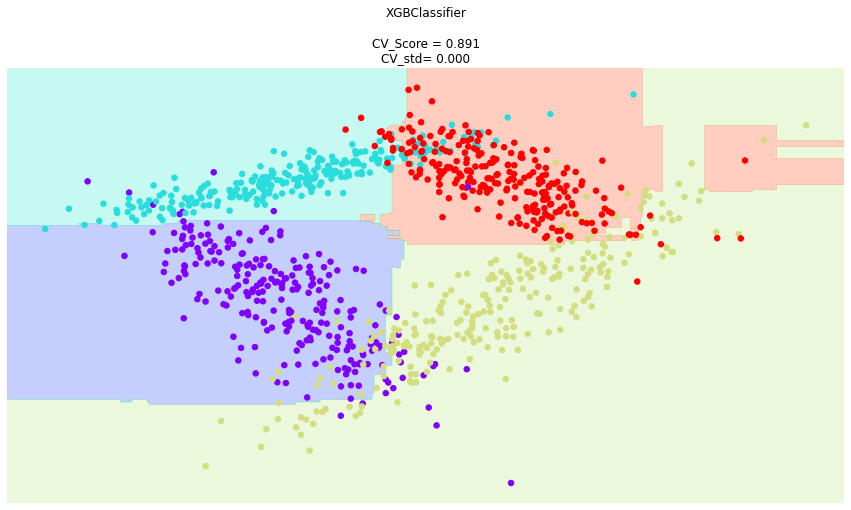

In [297]:
plot_clf(rnd_grid_xgb.best_estimator_, X, y, 500, score=rnd_grid_xgb.best_estimator_.score(X_train, y_train), std=0)

### [Naїve Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)

#### NB if we use continuous data for Multinomial distribution  

In [301]:
from sklearn.preprocessing import MinMaxScaler
# Bayes demands only positive numbers in data. Why?
scaler = MinMaxScaler(feature_range=(0,1000))
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1000))

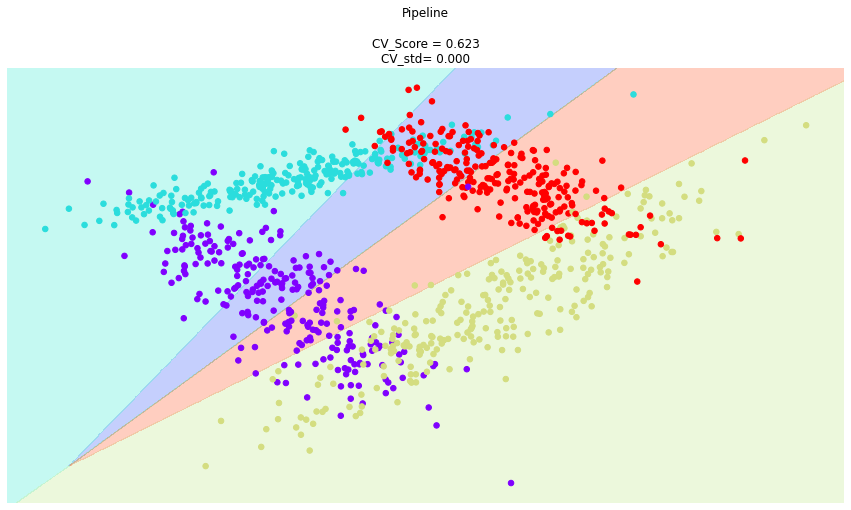

In [302]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.1,
                    fit_prior = False,
                    class_prior = None)

scale_pipeline = Pipeline([('scaler', scaler),
                           ('estimator',clf)])
                          
scale_pipeline.fit(X_train, y_train)
plot_clf(scale_pipeline, X,y,1000, score=scale_pipeline.score(X_train, y_train), std=0)

It looks desperate. But it's easy to fix! Try to find out how.

In [303]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer

#### NB if we use discrete data for Multinomial distribution  

In [304]:
# transform the dataset with KBinsDiscretizer
scaler = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit(X)

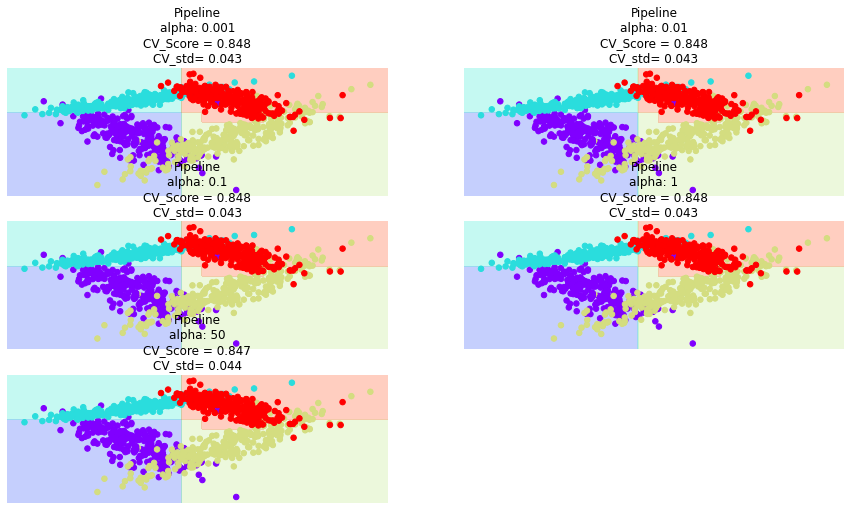

In [306]:
list_of_alpha = [0.001, 0.01, 0.1, 1, 50]

for i,alpha in enumerate(list_of_alpha):

    clf = MultinomialNB(alpha = alpha,
                        fit_prior = False,
                        class_prior = None)

    scale_pipeline = Pipeline([('scaler', scaler),
                               ('estimator',clf)])

    scale_pipeline.fit(X_train, y_train)

    scores = cross_val_score(scale_pipeline, X_train, y_train, scoring='accuracy', cv=10)
    #results['NaiveBayes'] = scale_pipeline.score(X_test,y_test)
    plt.subplot(320 + i + 1)
    plot_clf(scale_pipeline, X,y,1000, string='alpha: '+str(alpha),
             score=scores.mean(), std=scores.std())


In [307]:
clf = MultinomialNB(alpha = 0.1,
                    fit_prior = False,
                    class_prior = None)

scale_pipeline = Pipeline([('scaler', scaler),
                           ('estimator',clf)])
                          
scale_pipeline.fit(X_train, y_train)
results['NaiveBayes_MultinomialNB'] = scale_pipeline.score(X_test,y_test)

#### Gaussian Naїve Bayes

Let's start from prior assumption, that classes have Gaussian distribution.

In [308]:
from sklearn.naive_bayes import GaussianNB

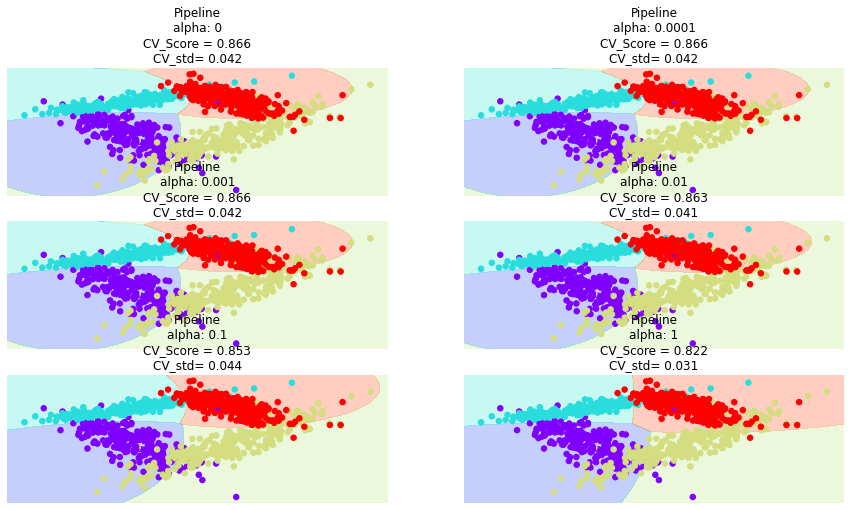

In [309]:
list_of_alpha = [0, 0.0001, 0.001, 0.01, 0.1, 1]

for i,alpha in enumerate(list_of_alpha):

    clf = GaussianNB(var_smoothing = alpha,)
    scale_pipeline = Pipeline([('estimator',clf)])

    scale_pipeline.fit(X_train, y_train)
    scores = cross_val_score(scale_pipeline, X_train, y_train, scoring='accuracy', cv=10)
    
    #results['NaiveBayes'] = scale_pipeline.score(X_test,y_test)
    plt.subplot(320 + i + 1)
    plot_clf(scale_pipeline, X,y,1000, string='alpha: '+str(alpha),
             score=scores.mean(), std=scores.std())


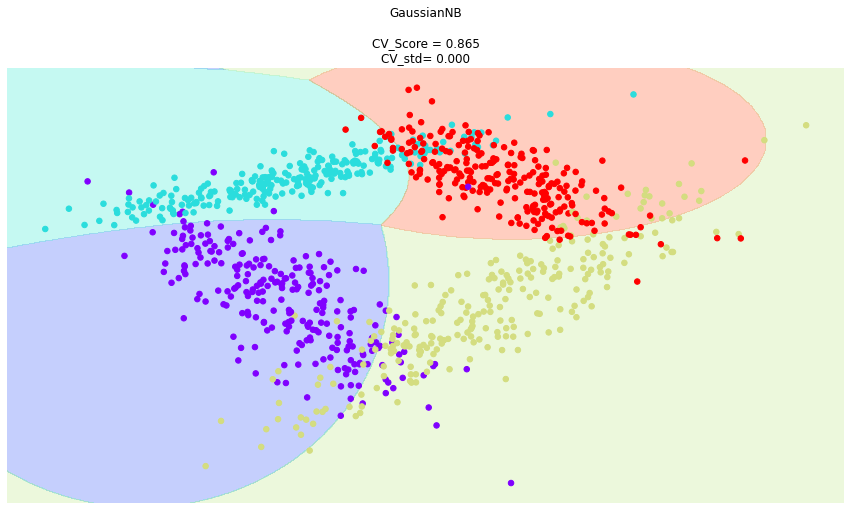

In [311]:
clf = GaussianNB(var_smoothing = 0)
clf.fit(X_train, y_train)
results['GaussNaiveBayes'] = clf.score(X_test,y_test)
plot_clf(clf, X,y,1000, score=clf.score(X_train, y_train), std=0)

### [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html#neighbors) Classifier

The simplest non-parametric classifier

In [312]:
from sklearn.neighbors import KNeighborsClassifier

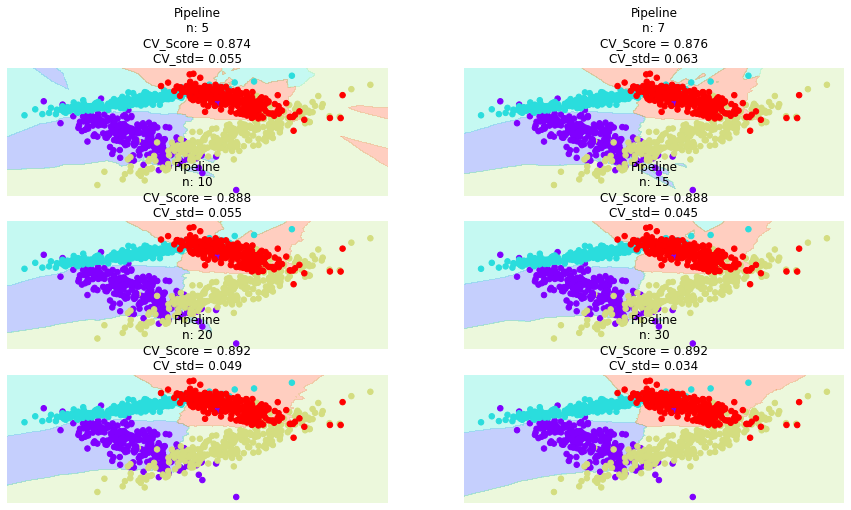

In [313]:
list_of_n = [5, 7, 10, 15, 20, 30]

for i,n in enumerate(list_of_n):

    model = KNeighborsClassifier(n_neighbors=n,
                                 weights='uniform',
                                 algorithm='auto',
                                 leaf_size=30,
                                 p=2,
                                 metric='minkowski',
                                 metric_params=None,
                                 n_jobs=None)
    pipeline = Pipeline([('estimator',model)])
    
    pipeline.fit(X_train, y_train)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=10)
    #results['KNN'] = model.score(X_test,y_test)
    plt.subplot(320 + i + 1)
    plot_clf(pipeline, X,y,500, string='n: '+str(n),
                 score=scores.mean(), std=scores.std())


#### KNeighborsClassifier with n_neighbors=30 has the best score and the smallest std

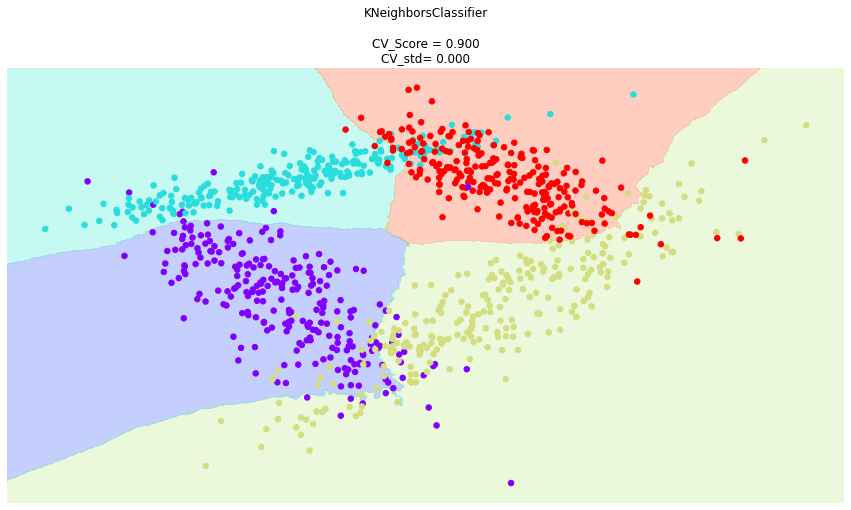

In [315]:
model = KNeighborsClassifier(n_neighbors=30,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             n_jobs=None)
model.fit(X_train, y_train)
results['KNN'] = model.score(X_test,y_test)
plot_clf(model, X,y,500, score=model.score(X_train, y_train), std=0)

### [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#svm)

The greatest approach from classical era is still great.

Details could look little weird sometimes, it's because SVM isn't actually implemented in sklearn, instead wrapping of [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) is used. Everybody do it, there is literally no other implementations of SVM.

#### Linear Support Vector Classfier

Linear model again! Compare with Linear Regression.

In [316]:
from sklearn.svm import LinearSVC

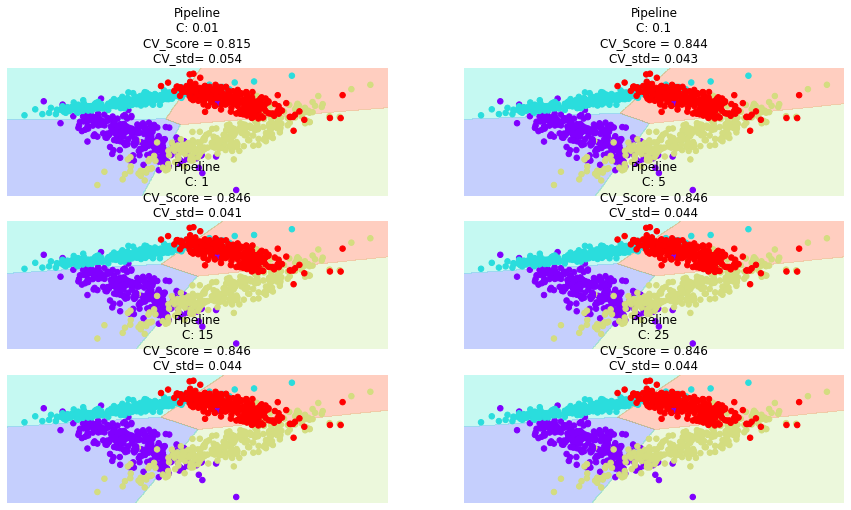

In [317]:
list_of_C = [0.01, 0.1, 1, 5, 15, 25]

for i,C in enumerate(list_of_C):
    clf = LinearSVC(penalty='l2', 
                    loss='squared_hinge', #squared_hinge
                    dual=False,
                    tol=1e-4,
                    C=C,
                    multi_class='ovr', #crammer_singer
                    fit_intercept=True,
                    intercept_scaling=1,
                    class_weight=None,
                    verbose=0,
                    random_state=None,
                    max_iter=1000)

    pipeline = Pipeline([('estimator',clf)])
    
    pipeline.fit(X, y)  

    pipeline.fit(X_train, y_train)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=10)
    #results['SVM'] = clf.score(X_test,y_test)
    plt.subplot(320 + i + 1)
    plot_clf(pipeline, X,y,500, string='C: '+str(C),
                 score=scores.mean(), std=scores.std())


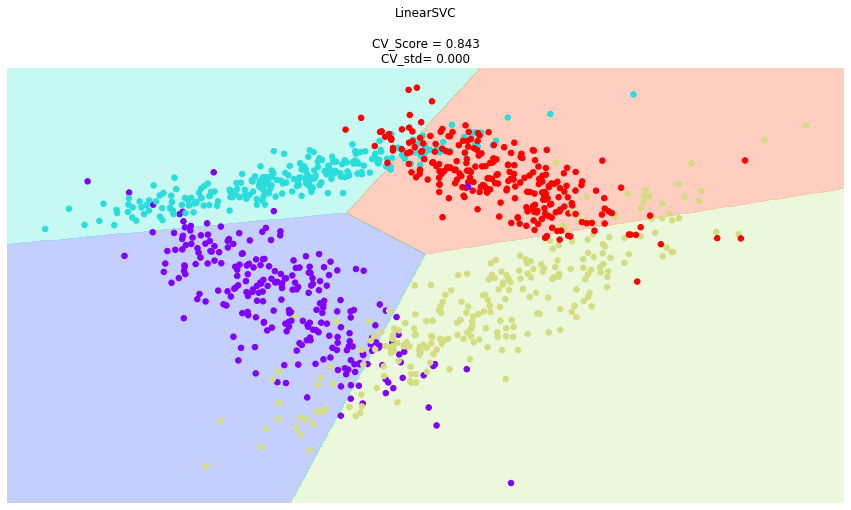

In [318]:
clf = LinearSVC(penalty='l2', 
                loss='squared_hinge',
                dual=False,
                tol=1e-4,
                C=1,
                multi_class='ovr',
                fit_intercept=True,
                intercept_scaling=1,
                class_weight=None,
                verbose=0,
                random_state=None,
                max_iter=1000)
clf.fit(X, y)  

clf.fit(X_train, y_train)
results['SVM'] = clf.score(X_test,y_test)
plot_clf(clf, X,y,500, score=clf.score(X_train,y_train), std=0)

#### Support Vector Machine with Kernel Trick

[Kernel Trick](https://www.quora.com/What-is-the-kernel-trick) computes polynomial separation without calculating polynomial coefficients. It could be used with many other models, but was invented for SVM and combines with it in the most elegant way. 

In [319]:
from sklearn.svm import SVC

### GridSearchCV

In [320]:
# set the static parameters if any
model = SVC()

# setting parameters to try
# Caution! All COMBINATIONS will be tried! 
param_grid = dict(kernel=['rbf', 'linear', 'poly', 'sigmoid'],
                  degree=[3, 5],
                  C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
                  cache_size=[200],
                  class_weight=[None],
                  coef0=[0.0],
                  decision_function_shape=['ovo', 'ovr'],
                  gamma=['scale', 'auto'],
                  max_iter=[-1],
                  probability=[False],
                  random_state=[None],
                  shrinking=[True],
                  tol=[0.001],
                  verbose=[False])

grid_svm = GridSearchCV(model, param_grid, cv=10,
                        scoring='accuracy', n_jobs = -1, verbose = 1)

In [321]:
%%time
grid_svm.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    8.4s


Wall time: 1min 23s


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.4min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'cache...ght': [None],
                         'coef0': [0.0],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'max_iter': [-1], 'probability': [False],
                         'random_state': [None], 'shrinking': [True],
                         'tol': [0.001], 'verb

In [322]:
print("grid.best_score_ {:.2f}".format(grid_svm.best_score_))

print("grid.best_params_ {}".format(grid_svm.best_params_))
print('\n')
print("grid.best_estimator_ {}".format(grid_svm.best_estimator_))


grid.best_score_ 0.89
grid.best_params_ {'C': 10, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


grid.best_estimator_ SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


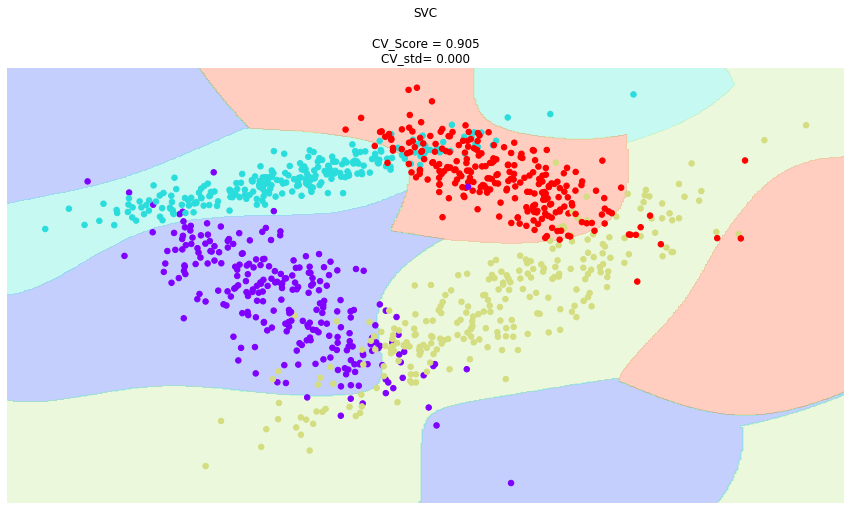

In [323]:
results['Kernel_SVM']  = grid_svm.best_estimator_.score(X_test,y_test)
plot_clf(grid_svm.best_estimator_, X,y,500, score=grid_svm.best_estimator_.score(X_train,y_train), std=0)

## Compare results


In [324]:
import pandas as pd

In [325]:
results

{'LogReg': 0.824,
 'LogReg_3': 0.848,
 'Tree_overfit': 0.848,
 'Tree': 0.852,
 'Tree_3': 0.852,
 'RandomForest': 0.88,
 'GBM': 0.832,
 'XGB_GBM_overfit': 0.86,
 'XGB_GBM': 0.86,
 'NaiveBayes_MultinomialNB': 0.824,
 'GaussNaiveBayes': 0.852,
 'KNN': 0.876,
 'SVM': 0.824,
 'Kernel_SVM': 0.872}

In [326]:
(
    pd.DataFrame.from_dict(data = results,     
                           orient = 'index',
                           columns = ['Score']).
                sort_values('Score',ascending = False).
                style.bar()
)